# Lab session of Image Analysis
## BE 3. Image filtering, edge detection, object detection
### Duration: 2h

**Instructions:** Submit a **report** for each group (up to two people per group) of the session in a single **notebook**, name it **LabX_Name1_Name2**, with X the number of the lab session and **Name1,2** your surnames. Upload the notebook to the folder on **Chamilo**, corresponding to your supervisor associated to this session. We allow either the `ipynb` or `pdf` file format (`File -> Save and export notebook as -> pdf through LaTeX`). If you were already assigned a personal repository for your group, you can also upload this content there through **git**.

**Deadline submission:** The material report should be submitted within a week from the lab work.

**Objectives** The objectives of this lab work are:
- Evaluate the performances of image denoising
- Object detection by phase correlation

In [1]:
%%capture
%pip install -r requirements.txt
%matplotlib inline

In [2]:
import numpy as np
import skimage
import scipy.ndimage
import matplotlib.pyplot as plt

images_folder = "images/"

## Denoising

To evaluate the performances of image denoising, we artificially add noise to images and try to dampen it. This way, we can compare the denoised image to the reference one. We can use for this exercise some of the images provided by `scikit-image`.

In [3]:
# Loading cameraman, grass and coffee
img_cameraman = skimage.img_as_float(skimage.data.camera())
img_grass = skimage.img_as_float(skimage.data.grass())
img_coffee = skimage.color.rgb2gray(skimage.img_as_float(skimage.data.coffee()))

### _Laboratory activity_

**Exercise:**
- Pick any of the images (just one among **cameraman**, **grass**, or **coffee**) and add Gaussian noise to it, using different values of noise power.
    - Note: you can use the function `Inoisy = Iin + sigma * numpy.random.normal(size=img1.shape)`, where `Iin` is the input image and `sigma` the standard deviation of the noise.
- Repeat the exercise by adding *salt & pepper* noise to the image.
    - Note: you can use the function `skimage.util.random_noise(I_in, mode='s&p', amount=dens)`, where `dens` represents the noise density.
- Compare the histograms of the image before and after adding the noise

**Question:**

- Which is the effect of different values of the noise power `sigma` to the image histogram?

In [4]:
# To do

## Denoising
While many strategies are available for dampening the noise, we recall here two of the most basic alternatives:

- **Mean filtering**, that is a convolution with a filter with equal coefficients.
    - Note: You can use `cv2.filter2D(...)` or `scipy.ndimage.convolve(...)` for the convolution and `np.ones` to create the filter.
- **Median filtering**, that is a choosing the mean value within a window around each pixel.
    - Note: You can use `cv2.medianBlur(...)` or `scipy.ndimage.median_filter(...)` to perform a median filtering.

### _Laboratory activity_

**Exercise:**
- Consider the image with Gaussian noise (choose `sigma=0.25`), find the size for the mean filter and find the size for the median filter which provide the best quality of the image after filtering.

**Question:**
- What are the disadvantages of choosing a filter size too small or too large and which effects do they have on the final product?

In [5]:
# To do

### _Laboratory activity_

**Exercise:**
- Repeat the exercise for the image with salt \& pepper noise, once again choosing the best filter size.

**Question:**
- Which filter provides the best noise dampening for each of this case and that before? Give a motivation for your answer.

In [6]:
# To do

## Quality assessment

In image processing, it is often good practice to define an "objective" metric of the image to assess the quality of the reconstructed image. 
One such example is the PSNR, defined as:

$PSNR = 10 \log_{10} \left(\frac{d^2}{\text{MSE}(I_{ref},\;I_{cmp})}\right)$

where $d$ is the maximum possible value of the image ($d = 255$ for 8-bit images) and MSE represents the mean square error among the two images. 

In the above equation, $I_{ref}$ is a reference image and $I_{cmp}$ is the image to be compared. For example, in the case of denoising considered above, $I_{ref}$ may define the original image before adding noise, while $I_{cmp}$ is the reconstructed image after filtering.

We provide the implementation of such quality metric below.

In [7]:
def psnr(img_reference, img_compared, d=255):
    mse = np.mean((img_reference - img_compared) ** 2)
    return 10 * np.log10(d**2 / mse)

### _Laboratory activity_

**Exercise:**
For the case of Gaussian noisy image:
- compare the PSNR of the image before and after denoising 
- compare the PSNR obtained both by reconstructing with mean and median filter.

**Question:**
- What is the ideal value of this quality index?
- What are some scenarios in which the use of this quality index may not prove effective?

In [8]:
# To do

## Edge detection

While various filters are available for the detection of the edges of the image, one of the most common methods involves the use of the Sobel filter.

The operation in the horizontal direction allows to obtain a set of coefficients $I_h$ through a convolution of the image by the filter:

$\mathbf{H} = 
\begin{bmatrix} 
    +1 &0 &-1\\
    +2 &0 &-2\\
    +1 &0 &-1
\end{bmatrix}    
\,.$

Similarly, one could obtain the coefficients of the gradient $I_v$ in the vertical direction through a convolution by $\mathbf{H}^T$.

In the above description $I_h$ and $I_v$ are Cartesian coordinates, but it is more common to express this type of image gradients in polar coordinates evaluating:
- Their amplitude $\sqrt{I_h^2 +I_v^2}$, which describes the steepness of the edge;
- Their polar angle $\theta = \arctan(I_h / I_v)$ which describes the direction of the edge.


We would like to apply this operation to an example image, for example the image **coffee** below.

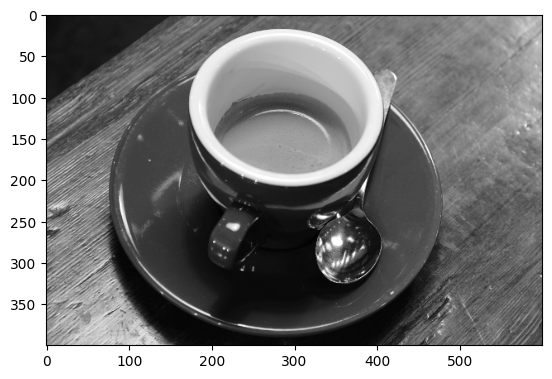

In [9]:
img_coffee = skimage.color.rgb2gray(skimage.img_as_float(skimage.data.coffee()))
fig, ax = plt.subplots()
ax.imshow(img_coffee, cmap="gray")
plt.show()

### _Laboratory Activity_

**Exercises:**
- Apply the Sobel filter in both directions
    - Note: you can use the function `cv2.Sobel(...)` or `scipy.ndimage.sobel(...)` (recommended) to achieve this result
- Combine the two results, obtaining a metric for the steepness of the edge.

**Questions:**
- Intuitively, why are the coefficients of the Sobel filter with that value and arrangment?
- Roughly, what are the spectral characteristics that you expect the Sobel filter to have?

In [10]:
# To do

### _Laboratory activity_
**Exercise:**
- Evaluate the direction of the edge at every edge pixel (that is, where the Sobel coefficients $\sqrt{I_h^2 +I_v^2}$ are above a certain threshold).
    - Note: you may use the `twilight` colormap (`ax.imshow(..., cmap="twilight")`) in matplotlib for a better effect.

In [11]:
# To do

## Object detection and phase correlation

Open the image `tokens.tif` as $I_{in}$. The goal is to detect the position of tokens, specifically a black image with a white dot at the center of each token. To this end, implement the phase correlation method using a simulated disk $I_d$ as the element to detect. We briefly recall here that the phase correlation map $R$ is defined as:

$R = F^{-1}(\frac{F(I_{in}) F(I_{d})^*}{|F(I_{in}) F(I_{d})^*|})$

where $F(\cdot)$ is a Fourier transform, $F^{-1}(\cdot)$ its inverse, $*$ is the complex conjugate and $|\cdot|$ a modulus oparation.

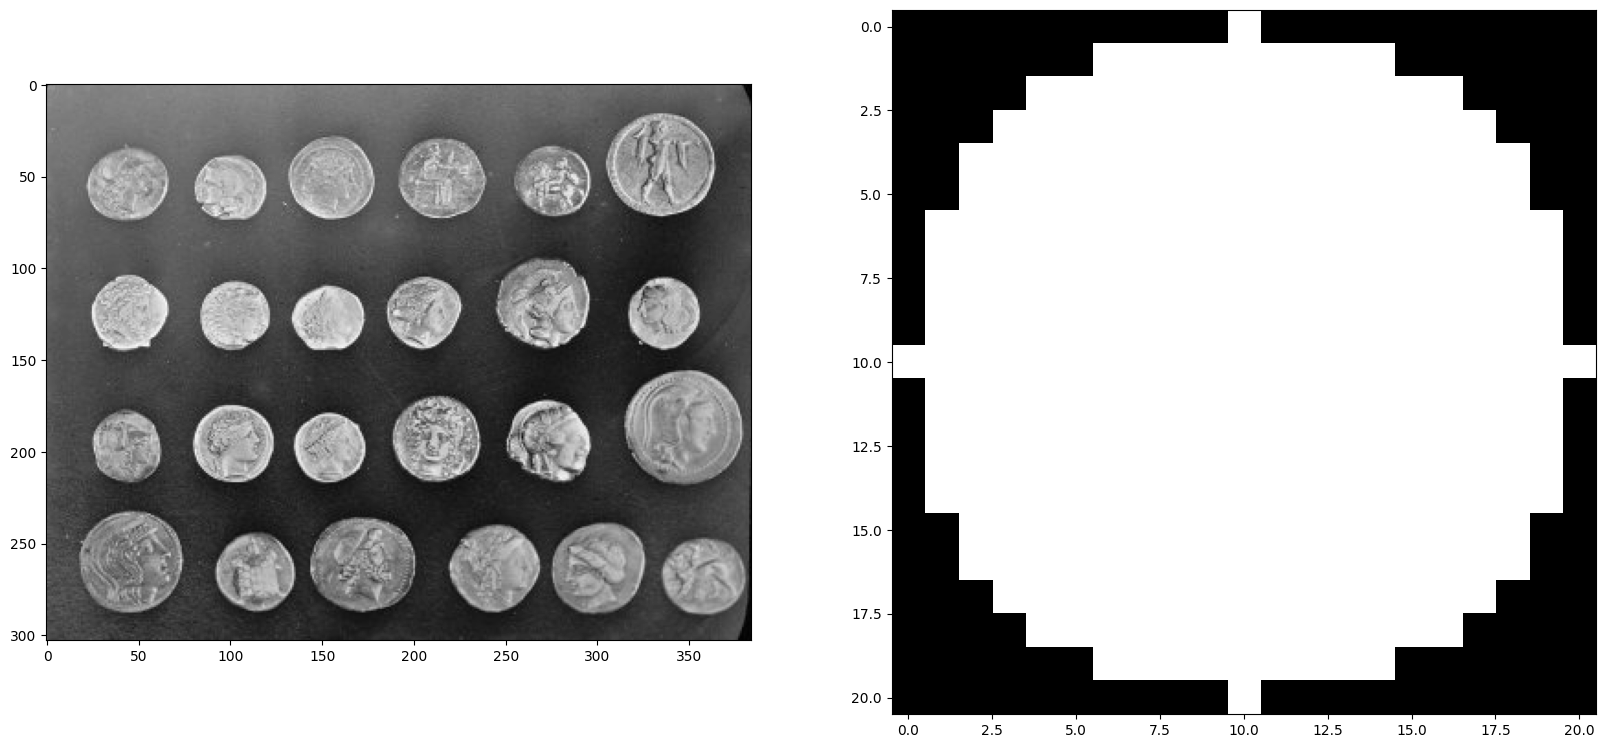

In [12]:
# Coin image
img_coins = skimage.img_as_float(skimage.data.coins())

# Simulated disk
coin_size = 10
img_structural_element = skimage.morphology.disk(coin_size)

_, ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].imshow(img_coins, cmap='gray')
ax[1].imshow(img_structural_element, cmap='gray')
plt.show()

### _Laboratory activity_

**Exercise:**
- Code the operations to perform the phase correlation and plot the result.
    - Note: use `np.fft.fft2(...)` to evaluate the Fourier transform of the image
- Experiment for different values of the radius of the disk.

**Questions:**
- What is the effect of changing the radius of the disk? What happens to coins that differ in size with respect to the disk?
- Mathematically, why does this image represents a phase correlation?

In [13]:
# To do